In [67]:
# Jacob, addition
import nltk
nltk.download('stopwords')

# originals
import pandas as pd
import numpy as np
import csv 
import string
import nltk 
import re 
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import sys
import warnings
from os import path
import ast
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_score
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.linear_model import RidgeClassifierCV

#df = pd.read_csv("jabref_2_binaryBodyTitleNoInd.csv")
#print(df.head())
#df.to_csv("binaryBodyTitles/jabref_2_binaryBodyTitle.csv", index=True)

pd.options.display.max_seq_items = 2000
pd.options.display.max_colwidth = 90
pd.options.display.max_rows = 999

# project
proj_name       = "mockito_2"
working_dir     = ""


# input
binaryBodyTitle = working_dir + "binaryBodyTitles/" + proj_name + '_' + "binaryBodyTitle.csv"
print( "Input Binary File: " + binaryBodyTitle )


# output
output_root_dir = working_dir + "CLEANED_NOStemsOrStopwords_SMOTE/"  
out_path        = output_root_dir 

print( "Output path      : " + out_path )

dfTeste_output  = out_path + "dfTeste.csv"
print( "dfTeste output   : " + dfTeste_output )
# UNUSED: loggingFile  = out_path + "TitleBody3GramTFIDF.txt"

# !! see In[45] for the definitions of these output paths. They are kept here for posterity but must be defined there
# tfIDFoutputFile        = out_path + 'tfIDFoutputFile'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
# classifierFeatureInput = out_path + 'train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
# termFrequencyTop50     = out_path + 'termFrequencyTop50'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
# predictions_result     = out_path + 'predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
# probabilities_result   = out_path + 'probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
# modelMatrix            = out_path + 'modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
# metrics_by_class       = out_path + 'metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  
# confusionMatrix        = out_path + 'CM'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type) 



Input Binary File: binaryBodyTitles/mockito_2_binaryBodyTitle.csv
Output path      : CLEANED_NOStemsOrStopwords_SMOTE/
dfTeste output   : CLEANED_NOStemsOrStopwords_SMOTE/dfTeste.csv


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
# -*- coding: utf-8 -*-
# Importing required Library
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

In [69]:


def create_dataset(n_sample=1000):
    ''' 
    Create an unevenly distributed sample data set multilabel  
    classification using make_classification function
    
    args
    nsample: int, Number of sample to be created
    
    return
    X: pandas.DataFrame, feature vector dataframe with 10 features 
    y: pandas.DataFrame, target vector dataframe with 5 labels
    '''
    X, y = make_classification(n_classes=5, class_sep=2, 
                           weights=[0.1,0.025, 0.205, 0.008, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=10, n_clusters_per_class=1, n_samples=1000, random_state=10)
    y = pd.get_dummies(y, prefix='class')
    return pd.DataFrame(X), y

def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe
    
    args
    df: pandas.DataFrame, target label df whose tail label has to identified
    
    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        #print(column)
        irpl[column] = df[columns[column]].value_counts()[1]
        #print(irpl[column])
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

def get_index(df):
    """
    give the index of all tail_label rows
    args
    df: pandas.DataFrame, target label df from which index for tail label has to identified
    
    return
    index: list, a list containing index number of all the tail label
    """
    tail_labels = get_tail_label(df)
    index = set()
    for tail_label in tail_labels:
        sub_index = set(df[df[tail_label]==1].index)
        index = index.union(sub_index)
    return list(index)

def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels
    
    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe
    
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    #print(y)
    index = get_index(y)
    #print(index)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=3,metric='euclidean',algorithm='kd_tree').fit(X) #n_neighbors=3 mockito and n_neighbors=5 all
    euclidean,indices= nbs.kneighbors(X)
    return indices

def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target



In [70]:
#organizing data_frame to issue order
def organize():
    #data_classes = pd.read_csv( binaryBodyTitle, header = 0, sep=';' )
    data_classes = pd.read_csv(binaryBodyTitle, header = 0, sep=';', error_bad_lines=False)

    # OBS!!!!!
    #line 62 mockito was deleted wrong number of columns!
    #line 1923 rxjava was deleted wrong number of columns!
    
    
    ## Code implemented below before modifications by Jacob ##
    # del data_classes['prIssue']
    # del data_classes['issueTitle']
    # del data_classes['issueBody']
    
    # these renames are listed in the order that the original name appears in the list of headers
    # coming in from the binary file
    # data_classes.rename(columns={ 'pr': 'prNumber',                                   
    #                               'Title': 'prTitle',                                 
    #                               'Body': 'prBody',                                   
    #                               'issue': 'issueNumber',                             
    #                               'issueComments': 'prComments',                      
    #                               'issueTitleLink': 'issueTitle',                     
    #                               'issueBodyLink': 'issueBody',                       
    #                               'issueCommentsLink': 'issue_Comments',              
    #                               'Comments': 'prCodeReviewComments' }, inplace=True) 
    
    # categories = data_classes.columns.values.tolist()
    
    
    # this list must match the headers coming in from the binary file in name and order, including
    # with the renames above
    # data_classes = data_classes[[ 'pr', 'Util', 'NLP', 'APM', 'Network', 'DB', 'Interpreter', 'Logging', 
    #                               'Thread', 'DataStructure', 'i18n', 'DevOps', 'Logic',  
    #                               'Microservices', 'ML', 'Test', 'Search', 'IO', 'UI', 'Parser', 'Security',
    #                               'Cloud', 'BigData', 'App', 'GIS', 'Title', 'Body', 'prIssue', 'issue', 
    #                               'issueTitle', 'issueBody', 'issueComments', 'issueTitleLink', 'issueBodyLink', 
    #                               'issueCommentsLink', 'isPR', 'isTrain', 'commitMessage', 'Comments']]  


    ## Code above after modifications by Jacob ##
    # these renames are listed in the order that the original name appears in the list of headers
    # coming in from the binary file
    data_classes.rename(columns={ 'pr': 'prNumber',                                   
                                  'Title': 'prTitle',                                 
                                  'Body': 'prBody',                                   
                                  'issue': 'issueNumber',                             
                                  'issueComments': 'prComments',                      
                                  #'issueTitleLink': 'issueTitle',                     
                                  #'issueBodyLink': 'issueBody',                       
                                  'issueCommentsLink': 'issue_Comments',              
                                  'Comments': 'prCodeReviewComments',
                                'Data Structure': 'DataStructure',
                                'Big Data': 'BigData'}, inplace=True) 
    
    categories = data_classes.columns.values.tolist()
    
    
    # this list must match the headers coming in from the binary file in name and order, including
    # with the renames above
    #data_classes = data_classes[[ 'prNumber', 'Util', 'NLP', 'APM', 'Network', 'DB', 'Interpreter', 'Logging', 
    #                              'Thread', 'DataStructure', 'i18n', 'DevOps', 'Logic',
    #                              'Microservices', 'ML', 'Test', 'Search', 'IO', 'UI', 'Parser', 'Security',
    #                              'Cloud', 'BigData', 'App', 'GIS', 'prTitle', 'prBody', 'prIssue', 'issueNumber', 
    #                              'issueTitle', 'issueBody', 'prComments', 'issueTitleLink', 'issueBodyLink', 
    #                              'issue_Comments', 'isPR', 'isTrain', 'commitMessage', 'prCodeReviewComments']]    

    # remove thread
    data_classes = data_classes[[ 'prNumber', 'Util', 'NLP', 'APM', 'Network', 'DB', 'Interpreter', 'Logging', 
                              'DataStructure', 'i18n', 'DevOps', 'Logic',
                              'Microservices', 'ML', 'Test', 'Search', 'IO', 'UI', 'Parser', 'Security',
                              'Cloud', 'BigData', 'App', 'GIS', 'prTitle', 'prBody', 'prIssue', 'issueNumber', 
                              'issueTitle', 'issueBody', 'prComments', 'issueTitleLink', 'issueBodyLink', 
                              'issue_Comments', 'isPR', 'isTrain', 'commitMessage', 'prCodeReviewComments']]    

    
    data_classes['issueNumber'] = data_classes['issueNumber'].astype('Int64')
    print('before filtering out empty classes',data_classes.shape)
    
    #find rows with parse error
    data_classes_error = data_classes.loc[pd.isnull(data_classes.loc[:,'Util'])]
    print('rows filtered out empty classes (parse error)',data_classes_error.shape)
    
    col_data_classes = len(data_classes.columns)

    if (len(data_classes_error) > 0):
        data_classes_fixed= data_classes_error.iloc[:,0].str.split(';', expand=True)
        print('rows fixed after new parse - empty classes (parse error)',data_classes_fixed.shape)

        col_data_classes_fixed = len(data_classes_fixed.columns)
        
        #removing rows with problems 
        data_classes.dropna(subset = ["Util"], inplace=True)
        print('after filtering out empty classes',data_classes.shape)
        
        print('len columns data_classes:',col_data_classes)
        print('len columns data_classes_fixed:',col_data_classes_fixed)
        
        if (col_data_classes == col_data_classes_fixed):
            
            names =['prNumber','DB','Interpreter','Logging','Thread','DataStructure','DevOps','i18n','Logic',
                    'Microservices','ML','Test','Search','IO','UI','Parser','Security','Cloud','BigData','App',
                    'GIS','Util','NLP','APM','Network','prTitle','prBody','prIssue','issueNumber','issueTitle',
                    'issueBody','prComments','issueTitleLink','issueBodyLink','issue_Comments','isPR','isTrain',
                    'commitMessage','prCodeReviewComments']                     
            data_classes_fixed.columns = names

            #drop data with error after parsing
            index_names = data_classes_fixed[ (data_classes_fixed['Util'] != '0') & (data_classes_fixed['Util'] != '1') |
                                     (data_classes_fixed['NLP'] != '0') & (data_classes_fixed['NLP'] != '1') |
                                     (data_classes_fixed['APM'] != '0') & (data_classes_fixed['APM'] != '1') |
                                     (data_classes_fixed['Network'] != '0') & (data_classes_fixed['Network'] != '1') |
                                     (data_classes_fixed['DB'] != '0') & (data_classes_fixed['DB'] != '1') |
                                     (data_classes_fixed['Interpreter'] != '0') & (data_classes_fixed['Interpreter'] != '1') |
                                     (data_classes_fixed['Logging'] != '0') & (data_classes_fixed['Logging'] != '1') |
                                     (data_classes_fixed['Thread'] != '0') & (data_classes_fixed['Thread'] != '1') |
                                     (data_classes_fixed['DataStructure'] != '0') & (data_classes_fixed['DataStructure'] != '1') |
                                     (data_classes_fixed['i18n'] != '0') & (data_classes_fixed['i18n'] != '1') |

                                     (data_classes_fixed['DevOps'] != '0') & (data_classes_fixed['DevOps'] != '1') |
                                     (data_classes_fixed['Logic'] != '0') & (data_classes_fixed['Logic'] != '1') |
                                   (data_classes_fixed['Microservices'] != '0') & (data_classes_fixed['Microservices'] != '1') |
                                   (data_classes_fixed['ML'] != '0') & (data_classes_fixed['ML'] != '1') |
                                   (data_classes_fixed['Test'] != '0') & (data_classes_fixed['Test'] != '1') |
                                   (data_classes_fixed['Search'] != '0') & (data_classes_fixed['Search'] != '1') |
                                   (data_classes_fixed['IO'] != '0') & (data_classes_fixed['IO'] != '1') |
                                   (data_classes_fixed['UI'] != '0') & (data_classes_fixed['UI'] != '1') |
                                   (data_classes_fixed['Parser'] != '0') & (data_classes_fixed['Parser'] != '1') |
                                 (data_classes_fixed['Security'] != '0') & (data_classes_fixed['Security'] != '1') |
                                 (data_classes_fixed['Cloud'] != '0') & (data_classes_fixed['Cloud'] != '1') |
                                 (data_classes_fixed['BigData'] != '0') & (data_classes_fixed['BigData'] != '1') |
                                 (data_classes_fixed['App'] != '0') & (data_classes_fixed['App'] != '1') |
                                 (data_classes_fixed['GIS'] != '0') & (data_classes_fixed['GIS'] != '1') 

                                    ].index

            # drop these given row
            # indexes from dataFrame
            data_classes_fixed.drop(index_names, inplace = True)
            print('data fixed after dropping parse fix errors',data_classes_fixed.shape)

            #back to float
            data_classes_fixed['Util'] = data_classes_fixed['Util'].astype(str).astype('Float64')
            data_classes_fixed['NLP'] = data_classes_fixed['NLP'].astype(str).astype('Float64')
            data_classes_fixed['APM'] = data_classes_fixed['APM'].astype(str).astype('Float64')
            data_classes_fixed['Network'] = data_classes_fixed['Network'].astype(str).astype('Float64')
            data_classes_fixed['DB'] = data_classes_fixed['DB'].astype(str).astype('Float64')
            data_classes_fixed['Interpreter'] = data_classes_fixed['Interpreter'].astype(str).astype('Float64')
            data_classes_fixed['Logging'] = data_classes_fixed['Logging'].astype(str).astype('Float64')
            data_classes_fixed['Thread'] = data_classes_fixed['Thread'].astype(str).astype('Float64')
            data_classes_fixed['DataStructure'] = data_classes_fixed['DataStructure'].astype(str).astype('Float64')
            data_classes_fixed['i18n'] = data_classes_fixed['i18n'].astype(str).astype('Float64')
            data_classes_fixed['DevOps'] = data_classes_fixed['DevOps'].astype(str).astype('Float64')
            data_classes_fixed['Logic'] = data_classes_fixed['Logic'].astype(str).astype('Float64')
            data_classes_fixed['Microservices'] = data_classes_fixed['Microservices'].astype(str).astype('Float64')
            data_classes_fixed['ML'] = data_classes_fixed['ML'].astype(str).astype('Float64')
            data_classes_fixed['Test'] = data_classes_fixed['Test'].astype(str).astype('Float64')
            data_classes_fixed['Search'] = data_classes_fixed['Search'].astype(str).astype('Float64')
            data_classes_fixed['IO'] = data_classes_fixed['IO'].astype(str).astype('Float64')
            data_classes_fixed['UI'] = data_classes_fixed['UI'].astype(str).astype('Float64')
            data_classes_fixed['Parser'] = data_classes_fixed['Parser'].astype(str).astype('Float64')
            data_classes_fixed['Security'] = data_classes_fixed['Security'].astype(str).astype('Float64')
            data_classes_fixed['Cloud'] = data_classes_fixed['Cloud'].astype(str).astype('Float64')
            data_classes_fixed['BigData'] = data_classes_fixed['BigData'].astype(str).astype('Float64')
            data_classes_fixed['App'] = data_classes_fixed['App'].astype(str).astype('Float64')
            data_classes_fixed['GIS'] = data_classes_fixed['GIS'].astype(str).astype('Float64')

            # appending fixed rows
            data_classes_new = data_classes.append(data_classes_fixed)
            print('after appending fixed rows',data_classes_new.shape)

            return data_classes_new
        
        else:
            print('fixing parse errors failed')

            return data_classes
    
    else:
        
        print('no parse errors found')
        return data_classes

In [71]:
#Filtering issues with PRs
def filtering(data_classes):
    
    print('before filtering out isTrain == 0',data_classes.shape)

    IssuePRDataset = data_classes[data_classes["isTrain"] == 0]
    
    print('after filtering out isTrain == 0',IssuePRDataset.shape)


    #invalid number of issue = NaN
    # IssuePRDataset = IssuePRDataset.drop([1805])

    categories = IssuePRDataset.columns.values.tolist()
    
    return categories, IssuePRDataset

In [72]:
# RQ1.a - o quão sensível o resultado é em relação ao algoritmo? 
#vários algoritmos - BinaryRelevance
#todas as palavras, bootstrap, unigram 
#somente o título
def dataset_config(IssuePRDataset):
    # ORIGINAL
    # data_test1 = IssuePRDataset[['issueNumber','prNumber','issueTitle','Google Common', 
    #                              'Test', 'SO', 'IO', 'UI', 'Network', 'Security', 
    #                              'OpenOffice Documents', 'Database', 'Utils', 'PDF', 
    #                              'Logging', 'Latex']].copy()
    
    # WORKS WITH NEW INPUTS
    # data_test1 = IssuePRDataset[['issueNumber','prNumber','issueTitle', 'Test','IO', 'UI', 'Network', 'Security', 'Logging' ]].copy() 

    #data_test1 = IssuePRDataset[[ 'issueNumber','prNumber','issueTitle','issueBody', 'prTitle', 'prBody',
    #                         'issueTitleLink','issueBodyLink','commitMessage','prComments',
    #                         'Util', 
    #                              'NLP', 'APM', 'Network', 'DB', 'Interpreter',
    #                              'Logging', 'Thread', 'DataStructure', 'i18n', 
    ##                              'DevOps', 'Logic', 'Microservices', 'ML',
    #                              'Test', 'Search', 'IO', 'UI', 'Parser', 'Security',
    #                              'Cloud', 'BigData', 'App', 'GIS' ]].copy()

    #thread removed
    data_test1 = IssuePRDataset[[ 'issueNumber','prNumber','issueTitle','issueBody', 'prTitle', 'prBody',
                         'issueTitleLink','issueBodyLink','commitMessage','prComments',
                         'Util', 
                              'NLP', 'APM', 'Network', 'DB', 'Interpreter',
                              'Logging',  'DataStructure', 'i18n', 
                              'DevOps', 'Logic', 'Microservices', 'ML',
                              'Test', 'Search', 'IO', 'UI', 'Parser', 'Security',
                              'Cloud', 'BigData', 'App', 'GIS' ]].copy()

    #print(type(data_test1))
    #data_test1['corpus'] = IssuePRDataset['issueTitle'] + IssuePRDataset['issueBody']
    data_test1["corpus"] = data_test1["issueTitle"].map(str)+" "+ data_test1["issueBody"].map(str)+" "+ data_test1["prComments"].map(str)

    # rxjava 2489 terms
    # mockito 598
    # presto 4
    # guava 1140
    # jabref 740
    
    #data_test1["corpus"] = data_test1["issueTitle"].map(str) + ' ' + data_test1["issueBody"].map(str) + ' ' + data_test1["prTitle"].map(str) + ' ' + data_test1["prBody"].map(str)
    # rxjava 3002 terms
    
    del data_test1["issueTitle"]
    del data_test1["issueBody"]
    del data_test1["prTitle"]
    del data_test1["prBody"]
    del data_test1["issueTitleLink"]
    del data_test1["issueBodyLink"]
    del data_test1["commitMessage"]
    del data_test1["prComments"]

    print('before filtering out empty corpus',data_test1.shape)
    data_test1.dropna(subset = ["corpus"], inplace=True)
    
    data_test1['corpus'] = data_test1['corpus'].str.replace("nan",' ')
    print('after filtering out empty corpus',data_test1.shape)

    #removing utils because we won't to predict a so simple API that is basically used in all PRs
    #del data_test1["Util"]

    data_test1 = data_test1.reset_index(drop=True)
    
    return data_test1

In [73]:
#preprocessing text

#We first convert the comments to lower-case 
#then use custom made functions to remove html-tags, punctuation and non-alphabetic characters from the TitleBody.

def clean_data(data_test1):
    if not sys.warnoptions:
        warnings.simplefilter("ignore")

    def cleanHtml(sentence):
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, ' ', str(sentence))
        return cleantext

    def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
        cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
        cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
        cleaned = cleaned.strip()
        cleaned = cleaned.replace("\n"," ")
        return cleaned

    def keepAlpha(sentence):
        alpha_sent = ""
        for word in sentence.split():
            alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
            alpha_sent += alpha_word
            alpha_sent += " "
        alpha_sent = alpha_sent.strip()
        return alpha_sent

    #function pra remover palavras com menos de 3 tokens

    data_test1['corpus'] = data_test1['corpus'].str.lower()
    data_test1['corpus'] = data_test1['corpus'].apply(cleanHtml)
    data_test1['corpus'] = data_test1['corpus'].apply(cleanPunc)
    data_test1['corpus'] = data_test1['corpus'].apply(keepAlpha)
    
    return data_test1


In [74]:
#### removing stopwords

def remove_stop_words():
    stop_words = set(stopwords.words('english'))
    stop_words.update(['nan','pr','zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within','jabref','org','github','com','md','https','ad','changelog','','joelparkerhenderson','localizationupd',' localizationupd','localizationupd ','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the','Mr', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'])
    #stop_words.update(['i', 'me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

    re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

    return re_stop_words

In [75]:
def removeStopWords(sentence, re_stop_words):
    #global re_stop_words
    #print(sentence)
    return re_stop_words.sub(" ", sentence)

#removing words with less than 3 characters
#data_classes['titleBody'] = data_classes['titleBody'].str.findall('\w{3,}').str.join(' ')

In [76]:
def apply_stem(data_test1):
    stemmer = SnowballStemmer("english")
    
    def stemming(sentence):
        stemSentence = ""
        for word in sentence.split():
            stem = stemmer.stem(word)
            stemSentence += stem
            stemSentence += " "
        stemSentence = stemSentence.strip()
        return stemSentence
    
    data_test1['corpus'] = data_test1['corpus'].apply(stemming)
    #print(data_test1['corpus'])
    
    return data_test1


In [77]:
#TF-ID
def run_tf_idf(data, configurationTFIDF, num_feature, tfIDFoutputFile):
    #we need to text max_feature with 10, 20, 25, 50 
    #, max_features=num_feature
    vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range = configurationTFIDF, max_features=num_feature)
        
    tf_idf_results = vectorizer.fit_transform(data['corpus'])

    features = vectorizer.get_feature_names()

    #print(features)

    scores = (tf_idf_results.toarray())
    output_tf_idf = pd.DataFrame(scores)
    
    output_tf_idf = pd.concat([data['issueNumber'], output_tf_idf], axis=1)

    output_tf_idf.to_csv(tfIDFoutputFile, encoding='utf-8', header=False, index=False, sep=',')


    # remove words occuring less than 5 times
    #tfidf = TfidfVectorizer(min_df=5)
    #you can also remove common words:

    # remove words occuring in more than half the documents
    #tfidf = TfidfVectorizer(max_df=0.5)
    #you can also remove stopwords like this:
    

In [78]:
#analyzing frequency of TOP 50 terms

def analyze_top(data, termFrequencyTop50):
    docs = data['corpus'].tolist()

    cv = CountVectorizer()
    cv_fit=cv.fit_transform(docs)

    #print(cv.get_feature_names())
    #print(cv_fit.toarray())

    word_list = cv.get_feature_names()   

    count_list = cv_fit.toarray().sum(axis=0)
    term_frequency = dict(zip(word_list,count_list))

    a = sorted(term_frequency.items(), key=lambda x: x[1], reverse=True) 
    
    print('SIZE OF TERMS', len(a))
    
    top50 = a[:50]
    df_frequency = pd.DataFrame(top50, columns =['term', 'frequency'])  
    #df_frequency = pd.DataFrame(a, columns =['term', 'frequency'])  


    print(df_frequency)
    #print(a)

    df_frequency.to_csv(termFrequencyTop50, encoding='utf-8', header=False, index=False, sep=',')

    sns.set(font_scale = 2)
    plt.figure(figsize=(18,17))
    plt.xticks(rotation=90)
    plt.title("Frequency of terms ")
    plt.ylabel('term', fontsize=20)
    plt.xlabel('frequency', fontsize=20)
    ax = sns.barplot(x="frequency", y="term", data=df_frequency)
    
    return docs, a


In [79]:
#merging features TF-IDF with data_frame
def merging(data_test1, tfIDFoutputFile):
    feature = pd.read_csv(tfIDFoutputFile, header=None, sep=",")
    feature.rename(columns={0: 'issueNumber'}, inplace=True)

    data_classifier = data_test1.join(feature, lsuffix='issueNumber', rsuffix='issueNumber')

    categories = data_classifier.columns.values.tolist()
    
    return data_classifier, categories


In [80]:
def eval_metrics(predictions, probabilities, y_test):
    
    y_pred = predictions.values
    y_proba = probabilities.values

    #receiving the y_test true value from each pull request
    y_true = y_test.to_numpy()

    print("Accuracy Score")
    acc_ml = accuracy_score(y_true, y_pred)
    print(acc_ml)

    print("---------")
    print("")

    print("Accuracy Score not normalized")
    acc_score = accuracy_score(y_true, y_pred, normalize=False)
    print(acc_score)

    print("---------")
    print("")

    print("zero_one_loss")
    zeroOne = zero_one_loss(y_true, y_pred)
    print(zeroOne)

    print("---------")
    print("")

    print("Fmeasure Score")
    fmeasure_score = f1_score(y_true,y_pred, average='micro')
    #fmeasure_score = f1_score(y_true,y_pred, average='macro')
    print(fmeasure_score)

    print("---------")
    print("")

    #AUC-PR
    print("AUC-PR")
    pr_score = average_precision_score(y_true,y_proba,average='micro')
    print(pr_score)
    #pr_score = average_precision_score(y_true,y_proba,average='macro')

    print("---------")
    print("")


    print("hamming loss average")
    hamming_loss = skm.hamming_loss(y_true, y_pred)
    print(hamming_loss)

    print("---------")
    print("")

    print("Jaccard samples")
    jaccard_score_samples = jaccard_score(y_true, y_pred, average='samples')
    print(jaccard_score_samples)

    print("---------")
    print("")


    print("Jaccard macro")
    jaccard_macro = jaccard_score(y_true, y_pred, average='micro')
    print(jaccard_macro)
    #jaccard_score(y_true, y_pred, average=None)

    print("---------")
    print("")

    return y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro

In [81]:
def plot_classes(probability, y_true, y_test):
    precision = dict()
    recall = dict()
    average_precision = dict()

    n_classes = y_test.shape[1]

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], probability[:, i])
        average_precision[i] = average_precision_score(y_true[:, i], probability[:, i])

    precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),probability.ravel())

    average_precision["micro"] = average_precision_score(y_true, probability, average="micro")

    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

    plt.figure()
    plt.step(recall['micro'], precision['micro'], where='post')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))


In [82]:
import io
def confusion_matrix(y_true, y_pred, confusionMatrix, i, proj_name):

    data = multilabel_confusion_matrix(y_true, y_pred)
    #print('CM:',type(data))
    
    #labels = ['Util', 'NLP', 'APM', 'Network', 'DB', 'Interpreter',
    #                              'Logging', 'Thread', 'Data Structure', 'i18n', 
    #                              'DevOps', 'Logic', 'interpreter', 'Microservices', 'ML',
    #                              'Test', 'Search', 'IO', 'UI', 'Parser', 'Security',
    #                              'Cloud', 'Big Data', 'App', 'GIS']        

    if proj_name == 'jabref' or proj_name == 'jabref_2' or proj_name == 'jabref_without_filter':
        #labels = ['Util','NLP', 'APM', 'Network', 'DB', 'Interpreter',
        #                          'Logging',  'i18n', 
        #                          'DevOps', 'Logic',   
        #                          'Test', 'Search', 'IO', 'UI', 'Parser', 'Security',
        #                           'App']
        labels = ['Util', 'NLP', 'APM', 'Network', 'DB', 'Interpreter', 'Logging',
       'DataStructure', 'i18n', 'DevOps', 'Logic', 'Microservices', 'Test',
       'Search', 'IO', 'UI', 'Parser', 'Security', 'App']
        
    if proj_name == 'jabref50' or proj_name == 'jabref50_2' or proj_name == 'jabref50_without_filter':
        labels = ['Util','NLP', 'APM', 'Network', 'DB', 'Interpreter',
                                  'Logging',  'i18n', 
                                  'DevOps', 'Logic',   
                                  'Test', 'IO', 'UI', 'Security',
                                  'App']
    if proj_name == 'guava' or proj_name == 'guava_2' or proj_name == 'guava_without_filter':
        #labels = ['Util', 'Network', 'DB', 'Interpreter', 'Thread', 'i18n', 'Logic', 'Test', 'IO', 'UI', 'Security']
        labels = ['Util', 'Network', 'DB', 'Interpreter', 'i18n', 'Logic', 'Test', 'IO',
       'UI', 'Security', 'App']
        
    if proj_name == 'presto' or proj_name == 'presto_2' or proj_name == 'presto_without_filter':
        labels = ['Util', 'Network', 'DB', 'Interpreter', 'i18n', 'DevOps', 'Test', 'IO']

    if proj_name == 'mockito' or proj_name == 'mockito_2' or proj_name == 'mockito_without_filter':
        #labels = ['Util', 'Network', 'Interpreter', 'i18n', 'Logic', 'Test', 'IO',
       #'Security']
        labels = ['Util', 'Network', 'Interpreter', 'i18n', 'Logic', 'Test', 'IO',
       'Security', 'App']
        
    if proj_name == 'rxjava' or proj_name == 'rxjava_2' or proj_name == 'rxjava_without_filter':
        #labels = ['Util', 'Network', 'i18n', 'Test', 'IO']
        labels = ['Util', 'Network', 'Interpreter', 'i18n', 'Logic', 'Test', 'IO', 'App']


    metrics = pd.DataFrame()
    line = []
    dataLine = ""
    dataLine = "Label, TN, FP, FN, TP"
    line.append((dataLine))

    #for j in range (0,12):
    print('CM:', len(labels))
    #print('Data:', data.shape)
    for j in range (0,len(labels)):
        print(j)
        row = data[j]
        dataLine=""
        dataLine = labels[j] 
        #print(dataLine)
        for x in np.nditer(row):
            dataLine = dataLine + "," + str(x)
            #print(dataLine)
        line.append((dataLine))
        #print(line)
        
        metrics = pd.DataFrame(line)
    
    print(line)
    metrics.to_csv(confusionMatrix + str(i) +'.csv' , encoding='utf-8', header=True, index=False , sep=',')
    

In [83]:
#build the model 

def build_model(test_type):
    clf = BinaryRelevance(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])


    if test_type == "DecisionTree":
        clf = BinaryRelevance(classifier=DecisionTreeClassifier(), require_dense = [False, True])
        #clf = ClassifierChain(classifier=DecisionTreeClassifier(), require_dense = [False, True])
    if test_type == "LogisticRegression":
        clf = BinaryRelevance(classifier=LogisticRegression(random_state=0), require_dense = [False, True])
        #clf = ClassifierChain(classifier=LogisticRegression(random_state=0), require_dense = [False, True])
    if test_type == "RandomForest": 
        clf = BinaryRelevance(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])
        #clf = ClassifierChain(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])
    if test_type == "MLPClassifier":
        clf = BinaryRelevance(classifier=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1), require_dense = [False, True])
        #clf = ClassifierChain(classifier=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1), require_dense = [False, True])
    if test_type == "MLkNN":
        clf = BinaryRelevance(MLkNN(k=3))
        #clf = ClassifierChain(classifier=MLkNN(k=3))

    #This three works without probability
    if test_type == "LinearSVC":
        clf = BinaryRelevance(classifier=LinearSVC(), require_dense = [False, True])
    if test_type == "GaussianNB":
        clf = BinaryRelevance(classifier=GaussianNB(), require_dense = [False, True])
    if test_type == "RidgeClassifierCV":
        clf = BinaryRelevance(classifier=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]), require_dense = [False, True]) 
    if test_type == "BRkNNaClassifier":
        clf = BinaryRelevance(BRkNNaClassifier(k=3))

        
    return clf

In [84]:
def save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type, proj_name):

    line=[] 
    # line to csv report file
    
    if proj_name == 'jabref' or proj_name == 'jabref_2' or proj_name == 'jabref_without_filter':
        #names = ['Util','NLP', 'APM', 'Network', 'DB', 'Interpreter',
        #                          'Logging',  'i18n', 
        #                          'DevOps', 'Logic',   
        #                          'Test', 'Search', 'IO', 'UI', 'Parser', 'Security',
        #                          'App']
        names = ['Util', 'NLP', 'APM', 'Network', 'DB', 'Interpreter', 'Logging',
       'DataStructure', 'i18n', 'DevOps', 'Logic', 'Microservices', 'Test',
       'Search', 'IO', 'UI', 'Parser', 'Security', 'App']
       
    if proj_name == 'jabref50' or proj_name == 'jabref50_2' or proj_name == 'jabref50_without_filter':
        names = ['Util','NLP', 'APM', 'Network', 'DB', 'Interpreter',
                                  'Logging',  'i18n', 
                                  'DevOps', 'Logic',   
                                  'Test', 'IO', 'UI', 'Security',
                                  'App']

    if proj_name == 'guava' or proj_name == 'guava_2' or proj_name == 'guava_without_filter':
        #names = ['Util', 'Network', 'DB', 'Interpreter', 'Thread', 'i18n', 'Logic', 'Test', 'IO', 'UI', 'Security']
        names = ['Util', 'Network', 'DB', 'Interpreter', 'i18n', 'Logic', 'Test', 'IO',
       'UI', 'Security', 'App']
        
    if proj_name == 'presto' or proj_name == 'presto_2' or proj_name == 'presto_without_filter':
        names = ['Util', 'Network', 'DB', 'Interpreter', 'i18n', 'DevOps', 'Test', 'IO']

    if proj_name == 'mockito' or proj_name == 'mockito_2' or proj_name == 'mockito_without_filter':
        #names = ['Util', 'Network', 'Interpreter', 'i18n', 'Logic', 'Test', 'IO',
       #'Security']
        names = ['Util', 'Network', 'Interpreter', 'i18n', 'Logic', 'Test', 'IO',
       'Security', 'App']

    if proj_name == 'rxjava' or proj_name == 'rxjava_2' or proj_name == 'rxjava_without_filter':
        #names = ['Util', 'Network', 'i18n', 'Test', 'IO']
        names = ['Util', 'Network', 'Interpreter', 'i18n', 'Logic', 'Test', 'IO', 'App']
        
    prec, rec, fscore, sup = precision_recall_fscore_support(y_true,y_pred, average='micro')


    arr = [acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro,prec,rec, fscore]
    columns = ['Accuracy','Acc-Score','zero_one_loss','AUC-PR','hamming loss average','Jaccard samples','Jaccard macro','Precision','Recall','Fmeasure']
  
    df_metrics2 = pd.DataFrame([arr],columns=columns)
    print(df_metrics2)

    print("---------")
    print("")

    x = precision_recall_fscore_support(y_true,y_pred, average=None)
    print("")
    print("")

    df_metrics_by_class = pd.DataFrame.from_records(x, columns=names, index=['precision','recall','f-measure','samples_tested'])
    print(df_metrics_by_class)

    print("---------")
    print("")

    df_metrics2.to_csv(modelMatrix, encoding='utf-8', header=True, index=False, sep=',')    

    df_metrics_by_class.to_csv(metrics_by_class, encoding='utf-8', header=True, index=False, sep=',')    

    dataLine = ""
    dataLine = "tf-IDFMin, tf-IDFMax, #_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss, AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score, i"
    line.append((dataLine))
    dataLine =  str(configurationTFIDF) + "," + str(num_feature) + "," + stop_word + "," + str(size_test) + "," + str(test_type) + "," + str(acc_ml) + ","+ str(acc_score) + ","+ str(zeroOne) + "," + str(pr_score) + ","+ str(hamming_loss) + ","+ str(jaccard_score_samples) + ","+ str(jaccard_macro)+"," + str(prec)+","+str(rec)+","+str(fscore)+","+str(i) 
    line.append((dataLine))
    print(line)

    metrics = pd.DataFrame(line)
    metrics.to_csv('./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+str(i)+'.csv', encoding='utf-8', header=False, index=False, sep=',')    
    np.savetxt(r'./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+str(i)+'.txt', metrics.values, fmt='%s', delimiter=',')
    #np.savetxt(r'./experiment/new/'+proj_name+'/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+str(i)+'.txt', metrics.values, fmt='%s', delimiter=',')

    return prec, rec, fscore, sup

In [85]:
import datetime

def persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
           acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
           jaccard_macro , prec , rec, fscore, i):
    now = datetime.datetime.now()
    date_str = now.strftime("%Y-%m-%d %H:%M:%S")
    templateData = pd.read_csv(dfTeste_output, sep=',')
    
    #print ("Current date and time : ")
    #print (now.strftime("%Y-%m-%d %H:%M:%S"))
    headerdf = ['date_time','tf-IDF', '#_TopTerms','Stop_Word','Train/Test_Size','Algorithm','Accuracy_Score',
                'Accuracy_Score_not_normalized','zero_one_loss', 'AUC-PR','hamming_loss_avg','Jaccard_samples',
                'Jaccard_macro','Precision','Recall','Fmeasure_Score','i']


    tup = ( date_str,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
           str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
           str(jaccard_macro) , str(prec) , str(rec) , str(fscore) ,str(i))

    #print("tupla:", tup)
    #print(len(tup))

    list_tup  = [ date_str,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
           str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
           str(jaccard_macro) , str(prec) , str(rec) , str(fscore) ,str(i)]


    dfTeste = pd.DataFrame.from_records(data=[tup], columns=[headerdf])

    data_list = templateData.values.tolist()
    data_list.append(list_tup)
    new_data = pd.DataFrame(data_list)  
    #for row in templateData.itertuples():
    #    print(row)

    new_data.to_csv( dfTeste_output, encoding='utf-8', index=False, sep=',', header=headerdf)  
    

In [86]:
def run_split(dataset_smote, test_type, confusionMatrix, modelMatrix, metrics_by_class, configurationTFIDF ,num_feature ,stop_word ,size_test, proj_name):
    train = []
    test = []

    
    #our_X = data_classifier.iloc[:,16:916]
    #our_y = data_classifier.iloc[:,2:14]
    #dataset = pd.concat([our_y,our_X], axis=1)
    #dataset_smote = pd.concat([dataset, y_X_res], axis=0)
    
    #X = data_classifier
    X = dataset_smote
    splits = 10
    rs = ShuffleSplit(n_splits=splits, test_size= size_test, random_state=52)
    rs.get_n_splits(X)

    for train_index, test_index in rs.split(X):
         #print("%s %s" % (train_index, test_index))
         train.append(train_index)
         test.append(test_index)
        
    for i in range(0, len(train)):
        size_features = len(X.columns)
        
        data = dataset_smote.iloc[train[i]]
        
        if proj_name== 'jabref' or proj_name == 'jabref_2' or proj_name == 'jabref_without_filter':
            X_train = data.iloc[:,17:size_features] # jabref
            y_train = data.loc[:,'Util':'App'] # jabref

        if proj_name== 'jabref50' or proj_name == 'jabref50_2' or proj_name == 'jabref50_without_filter':
            X_train = data.iloc[:,15:size_features] # jabref
            y_train = data.loc[:,'Util':'App'] # jabref

        if proj_name == 'guava' or proj_name == 'guava_2' or proj_name == 'guava_without_filter':
            X_train = data.iloc[:,11:size_features] # guava
            y_train = data.loc[:,'Util':'App'] # guava
            
        if proj_name == 'presto' or proj_name == 'presto_2' or proj_name == 'presto_without_filter':
            X_train = data.iloc[:,9:size_features] # presto
            y_train = data.loc[:,'Util':'IO'] # presto

        if proj_name == 'mockito' or proj_name == 'mockito_2' or proj_name == 'mockito_without_filter':
            X_train = data.iloc[:,9:size_features] # mockito
            y_train = data.loc[:,'Util':'App'] # mockito
            
        if proj_name == 'rxjava' or proj_name == 'rxjava_2' or proj_name =='rxjava_without_filter':
            #X_train = data.iloc[:,9:size_features] # rxjava
            #y_train = data.loc[:,'Util':'IO'] # rxjava
            X_train = data.iloc[:,12:size_features] # rxjava
            y_train = data.loc[:,'Util':'App'] # rxjava
           

        data = dataset_smote.iloc[test[i]]

        if proj_name == 'jabref' or proj_name == 'jabref_2' or proj_name == 'jabref_without_filter': 
            X_test = data.iloc[:,17:size_features] #jabref
            y_test = data.loc[:,'Util':'App'] #jabref
        
        if proj_name== 'jabref50' or proj_name == 'jabref50_2' or proj_name == 'jabref50_without_filter':
            X_test = data.iloc[:,15:size_features] # jabref
            y_test = data.loc[:,'Util':'App'] # jabref

        if proj_name == 'guava' or proj_name == 'guava_2' or proj_name == 'guava_without_filter':
            X_test = data.iloc[:,11:size_features] #guava
            y_test = data.loc[:,'Util':'App'] #guava
            
        if proj_name == 'presto' or proj_name == 'presto_2' or proj_name == 'presto_without_filter':
            X_test = data.iloc[:,9:size_features] #presto
            y_test = data.loc[:,'Util':'IO'] #presto

        if proj_name == 'mockito' or proj_name == 'mockito_2' or proj_name == 'mockito_without_filter':
            X_test = data.iloc[:,9:size_features] #mockito
            y_test = data.loc[:,'Util':'App'] #mockito
            
        if proj_name == 'rxjava' or proj_name == 'rxjava_2' or proj_name =='rxjava_without_filter':
            #X_test = data.iloc[:,9:size_features] #rxjava
            #y_test = data.loc[:,'Util':'IO'] #rxjava
            X_test = data.iloc[:,12:size_features] # rxjava
            y_test = data.loc[:,'Util':'App'] # rxjava


        
        #print("================y_train\n=========================")

        #print(y_train.columns)
        #print(y_train.shape)

        #print("================X_train\n=========================")

        #print(X_train.columns)
        #print(X_train.shape)
        
        #print("================y_test\n=========================")

        #print(y_test.columns)
        #print(y_test.shape)
        
        #print("================X_test\n=========================")

        #print(X_test.columns)
        #print(X_test.shape)
        #print(len(X_test),len(X_test.columns))

        categories = y_test.columns.values.tolist()
        ids = y_test.index

        classifier_setup = build_model(test_type)
    
        clf = classifier_setup
        clf.fit(X_train,y_train)

        predict = clf.predict(X_test).toarray()
        try:
            probability = clf.predict_proba(X_test).toarray()
            #print (type(probability))
            #print(probability.shape[0])
            #print(probability.shape[1])
        except:
            probability = myArr = np.zeros((len(X_test),len(y_test.columns))) # rows = X_test & columns = y_test !!!
            
        predictions = pd.DataFrame(predict, index=ids, columns=categories) # with header
        probabilities = pd.DataFrame(probability, index=ids, columns=categories) # with header

        y_pred = predictions.values
        y_proba = probabilities.values

        y_true = y_test.to_numpy()

        y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro = eval_metrics(predictions, probabilities, y_test)

        plot_classes(probability, y_true, y_test)

        confusion_matrix(y_true, y_pred, confusionMatrix, i, proj_name)
        
        prec, rec, fscore, sup = save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type, proj_name)

        """persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
           acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
           jaccard_macro , prec , rec, fscore, i)"""
        

In [87]:
#number of shuffles (folds)
splits=10

#defining paths
# loggingFile = './experiment//TitleBody3GramTFIDF.txt'
# binaryBodyTitle = './experiment/binaryBodyTitle.csv'
template = output_root_dir + proj_name + '/' + 'dfTeste.csv'

configurationTFIDFList = [(1,1)]
#configurationTFIDFList = [(1,1),(2,2),(3,3),(4,4)]
#num_featureList = [25,50,100,500,1000,2500,5000]
#num_featureList = [90,179,358,716,895,1432,2864,5728]
#num_featureList = [895]

#num_featureList = [740] #jabref body 739 v2
#num_featureList = [1140] #guava body  1141 v2
#num_featureList = [4] #presto body 4 v2
#num_featureList = [598] #mockito body 597 v2
#num_featureList = [2489] #rxjava body 2436 v2
#num_featureList = [974] #jabref50 body

#num_featureList = [228] #jabref title
#num_featureList = [6] #guava title
#num_featureList = [7] #presto title
#num_featureList = [216] #mockito title
#num_featureList = [800] #rxjava title
#num_featureList = [838] #jabref50 title

#num_featureList = [794] #jabref title+body
#num_featureList = [1143] #guava title+body
#num_featureList = [10] #presto title+body
#num_featureList = [654] #mockito title+body
#num_featureList = [2615] #rxjava title+body
#num_featureList = [2818] #jabref50 title+body

#num_featureList = [1336] #jabref title+body+comments
#num_featureList = [1204] #guava title+body+comments
#num_featureList = [10] #presto title+body+comments
num_featureList = [974] #mockito title+body+comments
#num_featureList = [3269] #rxjava title+body+comments
#num_featureList = [5622] #jabref50 title+body+comments


size_testList = [0.2]
#size_testList = [0.2,0.3,0.4]
stop_wordList = ["Yes"]
#test_typeList = ["RandomForest","DecisionTree","LogisticRegression","MLPClassifier","MLkNN"]
#test_typeList = ["RandomForest","DecisionTree","MLPClassifier","MLkNN"]
#test_typeList = ["RandomForest","DecisionTree","MLPClassifier"]
test_typeList = ["RandomForest"]

#examples
#configurationTFIDFList = [(1,1),(2,2)]
#num_featureList = [25,50]
#size_testList = [0.2,0.3]
#stop_wordList = ["Yes","No"]
#test_typeList = ["RandomForest","DecisionTree"]

configurationTFIDF=(1,1)
num_feature=895

size_test=0.2

#stop_word = stop_wordList[i]
stop_word = "Yes"
stem = "Yes"
clear = "Yes"
test_type = "RandomForest"
# dont forget to have the file dfTeste.csv ready in the files folder only with the header!

def __main__():
    
    print("----------------") 
    now = datetime.datetime.now()

    
    print ("Current date and time : ")
    print (now.strftime("%Y-%m-%d %H:%M:%S"))

    print(proj_name)
    print("----------------") 

    # getting length of list 
    lengthT = len(configurationTFIDFList) 
    lengthF = len(num_featureList) 
    lengthS = len(size_testList)
    lengthY = len(test_typeList)
    
    # Iterating the index 
    # same as 'for i in range(len(list))' 
    for t in range(lengthT): 
        print("----------------") 
        print(configurationTFIDFList[t])
        print("----------------") 

        for f in range(lengthF): 
            print("----------------") 
            print(configurationTFIDFList[t])
            print(num_featureList[f]) 
            print("----------------") 


            for s in range(lengthS):
                print("----------------") 
                print(configurationTFIDFList[t]) 
                print(num_featureList[f]) 
                print(size_testList[s]) 
                print("----------------") 

                for y in range(lengthY):
                    print("----------------") 
                    print(configurationTFIDFList[t]) 
                    print(num_featureList[f]) 
                    print(size_testList[s]) 
                    print(test_typeList[y]) 
                    print("----------------") 

                    configurationTFIDF=configurationTFIDFList[t]
                    num_feature=num_featureList[f]

                    size_test=size_testList[s]

                    #stop_word = stop_wordList[i]
                    #stop_word = "Yes"

                    test_type = test_typeList[y]
                    
                    # tfIDFoutputFile = './experiment/tfIDFoutputFile'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    # classifierFeatureInput='./experiment/train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    # termFrequencyTop50 = './experiment/termFrequencyTop50'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    # predictions_result = './experiment/predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    # probabilities_result = './experiment/probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    # modelMatrix = './experiment/modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    # metrics_by_class = './experiment/metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  
                    # confusionMatrix = './experiment/CM'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type) 
                    tfIDFoutputFile        = out_path + 'tfIDFoutputFile'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    classifierFeatureInput = out_path + 'train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    termFrequencyTop50     = out_path + 'termFrequencyTop50'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    predictions_result     = out_path + 'predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    probabilities_result   = out_path + 'probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    modelMatrix            = out_path + 'modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
                    metrics_by_class       = out_path + 'metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  
                    confusionMatrix        = out_path + 'CM'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type) 
                    dataset_smote_out      = out_path + 'dataset_smote'+ str(configurationTFIDF) + str(num_feature) + str(size_test)+ str(test_type) + '-stop-'+stop_word+'-clear-'+clear+'-stem-'+stem
                    dataset_smote_out_pr   = out_path + 'dataset_smote_pr'+ str(configurationTFIDF) + str(num_feature) + str(size_test)+ str(test_type) + '-stop-'+stop_word+'-clear-'+clear+'-stem-'+stem
                    dataset_merged         = out_path + 'predictions_merged_pr'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type) 

                    data_classes = organize()
                    #print( data_classes )
                    categories, IssuePRDataset = filtering(data_classes)
                    data_test1 = dataset_config(IssuePRDataset)
                    if clear == "Yes":
                        data_test1 = clean_data(data_test1)
                    #print('################# data_test1 after fixing')
                    #print(data_test1)

#                   print('1',data_test1['corpus'])
                    
                    if stop_word == "Yes":
                        re_stop_words = remove_stop_words()
                        data_test1['corpus'] = data_test1['corpus'].apply(removeStopWords, re_stop_words=re_stop_words)
                    data = data_test1
#                    print('2',data_test1['corpus'])

                    if stem == "Yes":
                        data_test1 = apply_stem(data)
                        
                    docs, a = analyze_top(data_test1, termFrequencyTop50)

                    print('num features discivered automaticaly', len(a))
#                    print('3',data_test1['corpus'])
                    #run_tf_idf(data_test1, configurationTFIDF, num_feature, tfIDFoutputFile)
                    run_tf_idf(data_test1, configurationTFIDF, len(a), tfIDFoutputFile)
#                    print('4',data_test1['corpus'])
                    
                    data_classifier, categories = merging(data_test1, tfIDFoutputFile)     
                    
                    # some rows are with nan. df = df[df['my_var'].notna()] ?
                    # or should we change by blank spaces?

                    print("================COLUMNS BEFORE DELETION\n=========================")
                    print(data_classifier.shape)
                    #print(list(data_classifier.columns))
                    no_occurences = data_classifier.loc[:,'Util':'GIS'].sum()
                    #print(type(no_occurences))
                    print(no_occurences)  #df.loc[:, 'Score'].sum()
                        
                    if proj_name == 'presto' or proj_name == 'presto_2' or proj_name == 'presto_without_filter': 
                        print("================Presto-\nSUM OF COLUMNS\n=========================")

                        del data_classifier['NLP']
                        del data_classifier['APM']
                        del data_classifier['Logging']
                        #del data_classifier['Thread']
                        del data_classifier['DataStructure']
                        del data_classifier['Microservices']
                        del data_classifier['ML']
                        del data_classifier['Logic']
                        del data_classifier['Search']
                        del data_classifier['UI']
                        del data_classifier['Cloud']
                        del data_classifier['Parser']
                        del data_classifier['Security']
                        del data_classifier['BigData']
                        del data_classifier['App']
                        del data_classifier['GIS']
                        #print(data_classifier)


                    if proj_name == 'guava' or proj_name == 'guava_2' or proj_name == 'guava_without_filter': 
                        print("================Guava-\nSUM OF COLUMNS\n=========================")

                        del data_classifier['NLP']
                        del data_classifier['APM']
                        del data_classifier['Logging']
                        del data_classifier['DataStructure']
                        del data_classifier['DevOps']
                        del data_classifier['Microservices']
                        del data_classifier['ML']
                        del data_classifier['Search']
                        del data_classifier['Parser']
                        del data_classifier['Cloud']
                        del data_classifier['BigData']
                        #del data_classifier['App']
                        del data_classifier['GIS']
                    
                    if proj_name == 'jabref' or proj_name == 'jabref_2' or proj_name == 'jabref_without_filter': 
                        print("================JabRef-\nSUM OF COLUMNS\n=========================")

                        #del data_classifier['Thread']
                        #del data_classifier['DataStructure']
                        #del data_classifier['Microservices']
                        del data_classifier['ML']
                        del data_classifier['Cloud']
                        del data_classifier['BigData']
                        del data_classifier['GIS']

                    if proj_name == 'jabref50' or proj_name == 'jabref50_2' or proj_name == 'jabref50_without_filter': 
                        print("================JabRef-\nSUM OF COLUMNS\n=========================")

                        del data_classifier['Thread']
                        del data_classifier['DataStructure']
                        del data_classifier['Microservices']
                        del data_classifier['ML']
                        del data_classifier['Search']
                        del data_classifier['Parser']                        
                        del data_classifier['Cloud']
                        del data_classifier['BigData']
                        del data_classifier['GIS']
  
                    if proj_name == 'mockito' or proj_name == 'mockito_2' or proj_name =='mockito_without_filter':
                        print("================Mockito-\nSUM OF COLUMNS\n=========================")

                        del data_classifier['NLP']
                        del data_classifier['APM']
                        del data_classifier['DB']
                        del data_classifier['Logging']
                        #del data_classifier['Thread']
                        del data_classifier['DataStructure']  
                        del data_classifier['DevOps'] 
                        del data_classifier['Microservices']
                        del data_classifier['ML']
                        del data_classifier['Search']
                        del data_classifier['UI']
                        del data_classifier['Parser']
                        del data_classifier['Cloud']
                        del data_classifier['BigData']
                        #del data_classifier['App']
                        del data_classifier['GIS']

                    if proj_name == 'rxjava' or proj_name == 'rxjava_2' or proj_name =='rxjava_without_filter': 
                        print("================RxJava-\nSUM OF COLUMNS\n=========================")

                        del data_classifier['NLP']
                        del data_classifier['APM']
                        del data_classifier['DB']
                        #del data_classifier['Interpreter']
                        del data_classifier['Logging']
                        #del data_classifier['Thread']
                        del data_classifier['DataStructure']
                        del data_classifier['DevOps']
                        #del data_classifier['Logic']
                        del data_classifier['Microservices']
                        del data_classifier['ML']
                        del data_classifier['Search']
                        del data_classifier['UI']
                        del data_classifier['Cloud']
                        del data_classifier['Parser']
                        del data_classifier['Security']
                        del data_classifier['BigData']
                        #del data_classifier['App']
                        del data_classifier['GIS']
  

                    #print("================COLUMNS AFTER DELETION\n=========================")
                    #print(data_classifier.shape)
                    
                    #SMOTE)
                    print(list(data_classifier.columns))
                    
                    #SMOTE
                    limit = len(data_classifier.columns)
                    
                    if proj_name == 'jabref50' or proj_name == 'jabref50_2' or proj_name == 'jabref50_without_filter':
                        our_X = data_classifier.iloc[:,25:limit] # TF-IDF probabilities jabref
                        our_y = data_classifier.iloc[:,2:23] # Expert labels jabref
                    
                    if proj_name == 'jabref' or proj_name == 'jabref_2' or proj_name == 'jabref_without_filter':
                        our_X = data_classifier.iloc[:,23:limit] # TF-IDF probabilities jabref
                        our_y = data_classifier.iloc[:,2:21] # Expert labels jabref
                    
                    if proj_name == 'guava' or proj_name == 'guava_2' or proj_name == 'guava_without_filter': 
                        our_X = data_classifier.iloc[:,15:limit] # TF-IDF probabilities guava
                        our_y = data_classifier.iloc[:,2:13] # Expert labels guava

                    if proj_name == 'presto' or proj_name == 'presto_2' or proj_name == 'presto_without_filter': 
                        our_X = data_classifier.iloc[:,12:limit] # TF-IDF probabilities guava
                        our_y = data_classifier.iloc[:,2:10] # Expert labels guava
                        
                    if proj_name == 'mockito' or proj_name == 'mockito_2' or proj_name == 'mockito_without_filter': 
                        our_X = data_classifier.iloc[:,12:limit] # TF-IDF probabilities guava
                        our_y = data_classifier.iloc[:,2:11] # Expert labels guava

                    if proj_name == 'rxjava' or proj_name == 'rxjava_2' or proj_name =='rxjava_without_filter': 
                        our_X = data_classifier.iloc[:,13:limit] # TF-IDF probabilities guava
                        our_y = data_classifier.iloc[:,2:10] # Expert labels guava


                    print("================our_y AFTER DELETION\n=========================")
                    print(our_y.shape)
                    print(our_y.columns)
                    print("================our_X AFTER DELETION\n=========================")
                    print(our_X.shape)
                    print(our_X.columns)

                    dataset = pd.concat([our_y,our_X], axis=1)                    
                    print(dataset.shape)

                    if proj_name != 'presto' or proj_name == 'presto_2' or proj_name == 'presto_without_filter': 

                        X_sub, y_sub = get_minority_instace(our_X, our_y)   #Getting minority instance of that datframe


                        X_res,y_res =MLSMOTE(X_sub, y_sub, 100)     #Applying MLSMOTE to augment the dataframe

                        y_X_res = pd.concat([y_res,X_res], axis=1)
                        #y_X_res.shape

                        dataset_smote = pd.concat([dataset, y_X_res], axis=0)
                        
                    else:
                        
                        dataset_smote = dataset

                    print("================SMOTE \n=========================")

                    
                    print('dataset after smote:',dataset_smote.shape)
                    #print('dataset columns after smote:',list(dataset_smote.columns))
                    
                    dataset_smote.to_csv(dataset_smote_out+'.csv', encoding='utf-8', sep=',')    
                    
                    # get prNumber back
                    prsDF = data_classifier.iloc[:,1:2]
                    corpusDF = data_classifier.loc[:,'corpus']
                    dataset_smote_prs = prsDF.merge(dataset_smote, left_index=True, right_index=True)
                    
                    # do we need to create fake prs for those did not merge? 
                    # what happens if smote creates index for predictions that match real index?
                    # do we need to ignore them?
                    
                    print('dataset after smote with prs:',dataset_smote_prs.shape)
                    #print('dataset columns after smote with prs:',list(dataset_smote_prs.columns))
 
                    dataset_smote_prs.to_csv(dataset_smote_out_pr+'.csv', encoding='utf-8', sep=',')  
                    
                    dataset_smote_prs_corpus = dataset_smote_prs.merge(corpusDF, left_index=True, right_index=True)
                    dataset_smote_prs_corpus.to_csv(dataset_smote_out_pr+'_corpus.csv', encoding='utf-8', sep=',')  
                    print('dataset after smote with prs and corpus:',dataset_smote_prs_corpus.shape)

                    #run_split(data_classifier, test_type, confusionMatrix, modelMatrix, metrics_by_class, configurationTFIDF ,num_feature ,stop_word ,size_test)
                    run_split(dataset_smote, test_type, confusionMatrix, modelMatrix, metrics_by_class, configurationTFIDF ,num_feature ,stop_word ,size_test, proj_name)
                    
    print("----------------") 
    print( "Operations complete!")
    now = datetime.datetime.now()

    
    print ("Current date and time : ")
    print (now.strftime("%Y-%m-%d %H:%M:%S"))
    print("----------------") 



----------------
Current date and time : 
2021-12-14 12:56:35
mockito_2
----------------
----------------
(1, 1)
----------------
----------------
(1, 1)
974
----------------
----------------
(1, 1)
974
0.2
----------------
----------------
(1, 1)
974
0.2
RandomForest
----------------
before filtering out empty classes (509, 38)
rows filtered out empty classes (parse error) (0, 38)
no parse errors found
before filtering out isTrain == 0 (509, 38)
after filtering out isTrain == 0 (244, 38)
before filtering out empty corpus (244, 26)
after filtering out empty corpus (244, 26)


b'Skipping line 61: expected 42 fields, saw 43\nSkipping line 454: expected 42 fields, saw 43\n'


SIZE OF TERMS 2281
          term  frequency
0         test        251
1         merg        200
2         mock        199
3          use        171
4      mockito        155
5        class        148
6   dependabot        144
7        chang        140
8          fix        132
9       method        129
10      commit        119
11        issu        118
12         api        104
13        type         93
14        code         89
15         new         84
16       error         71
17         add         70
18       rebas         67
19     version         67
20       close         65
21        stub         65
22        work         65
23        time         62
24        case         59
25       could         59
26       junit         59
27       would         59
28      depend         58
29        fail         58
30       thank         58
31        make         56
32          ad         55
33        java         55
34      public         55
35        like         54
36      releas     

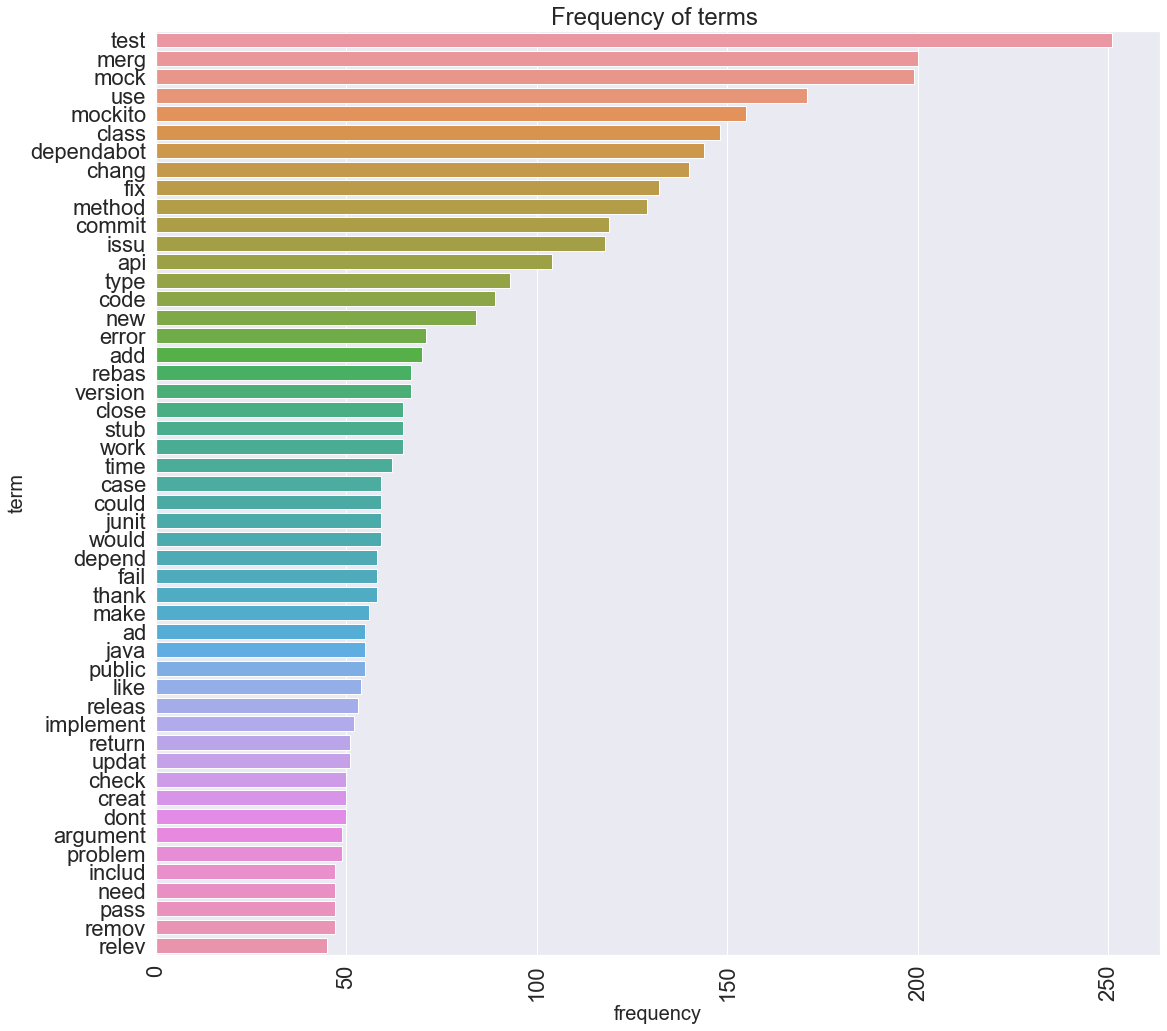

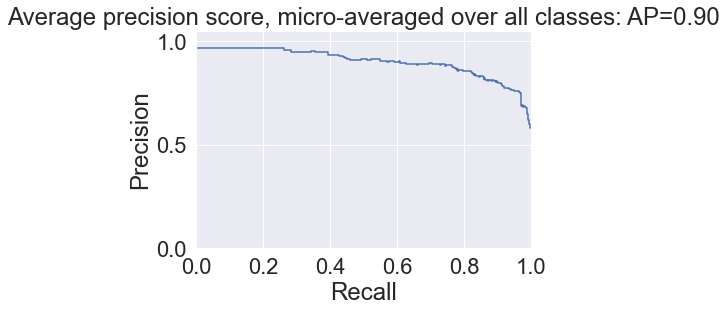

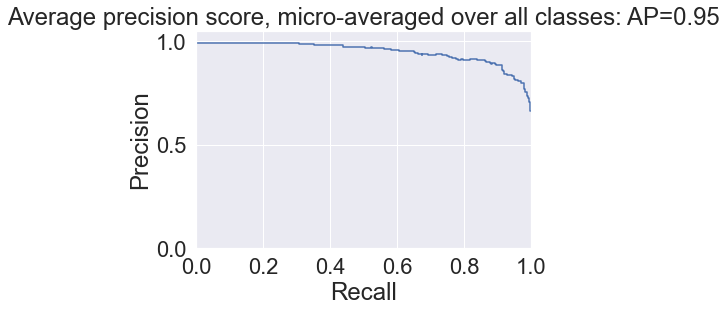

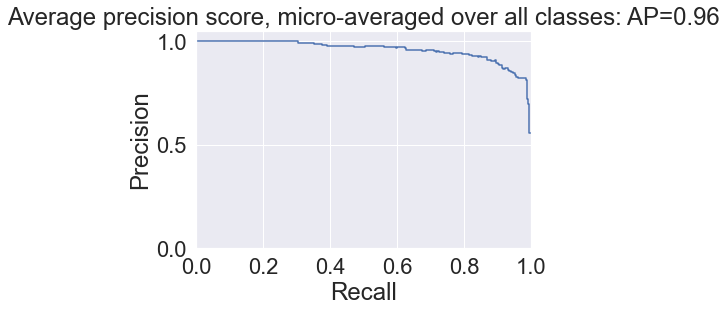

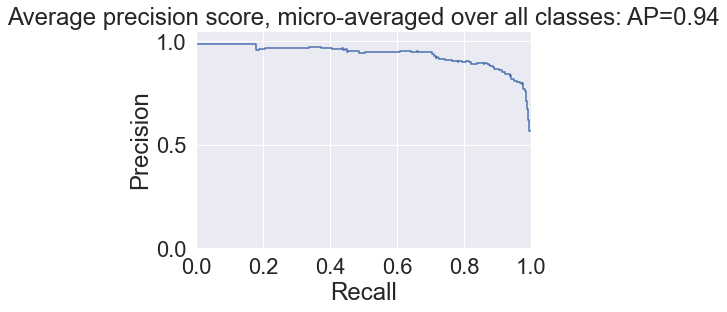

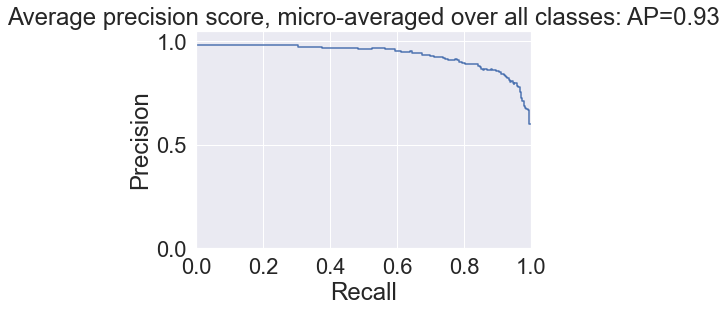

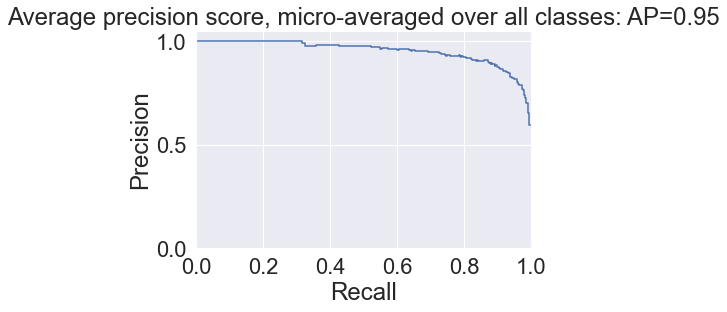

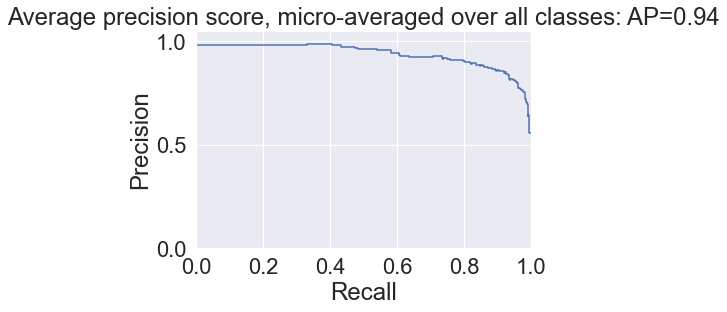

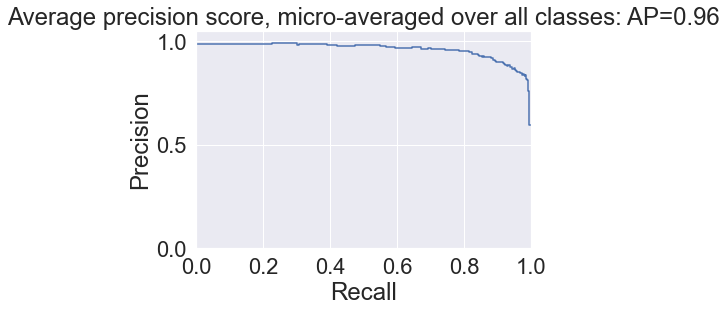

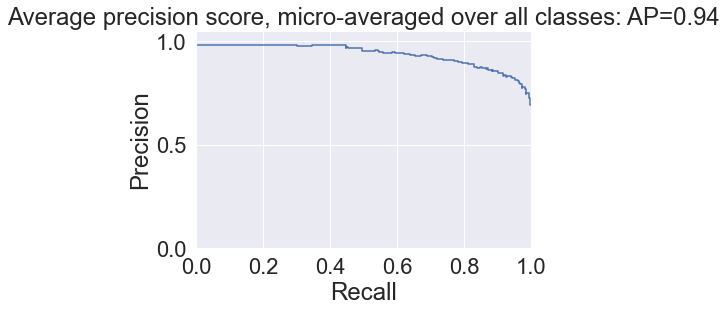

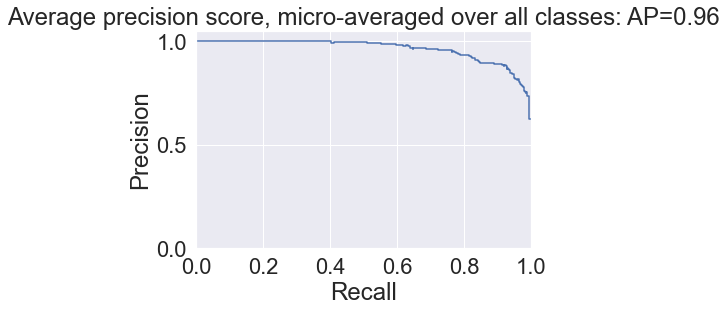

In [88]:
__main__()
